### Mert GÜLŞEN - 1500200332
### Ahmed Selim ÇELEĞEN - 1500200304

# Graph Theory Project

In [218]:
import igraph as ig
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

# Robustness Measures

## 1. Graph measure: Global Clustering Coefficient
## 2. Adjacency matrix measure: Spectral Gap
## 3. Laplacian measure: Algebraic Connectivity

In [19]:
def global_clustering_coefficient(G):
    gco = G.transitivity_undirected()
    return gco

def spectral_gap(G):
    adj = G.get_adjacency()
    adj = np.array([list(adj[i]) for i in range(adj.shape[0])])

    # print(adj)
    eigenvalues = np.linalg.eigvals(adj)
    eigenvalues = sorted(eigenvalues, reverse=True)
    sp_gap = np.real(eigenvalues[0]-eigenvalues[1])
    return sp_gap

def algebraic_connectivity(G):
    laplacian_matrix = G.laplacian()
    laplacian_matrix = np.array(laplacian_matrix)
    eigs = np.linalg.eigvals(laplacian_matrix)
    eigs = eigs[eigs != 0]
    eigs = np.real(np.sort(eigs))
    return eigs[1]

In [39]:
# Helper function for plotting graph models
def plot_models(graphs, color="red", vertex_size=0.2, figsize=(16, 16), row=2, column=5, title="Graphs"):
    fig, axs = plt.subplots(row, column, figsize=figsize)
    for i in range(row):
        for j in range(column):
            ax = axs[i, j] if row != 1 else axs[j]
            ig.plot(
                graphs[i*column+j],
                label="asd",
                target=ax,
                vertex_color=color,
                vertex_size=vertex_size,
                edge_width=0.5
            )
            ax.title.set_text(f"ID={i*column+j+1}, Nodes={graphs[i*column+j].vcount()}, Edges={graphs[i*column+j].ecount()}")
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

In [21]:
erdos_graphs = []
n = 10
for i in range(n):
    nodes = np.random.randint(50, 200)
    edges = np.random.randint(150, 250)
    eg = ig.Graph.Erdos_Renyi(n=nodes, m=edges, directed=False, loops=False)
    ig.summary(eg)
    erdos_graphs.append(eg)

IGRAPH U--- 149 237 -- 
IGRAPH U--- 198 219 -- 
IGRAPH U--- 154 191 -- 
IGRAPH U--- 112 165 -- 
IGRAPH U--- 196 172 -- 
IGRAPH U--- 115 215 -- 
IGRAPH U--- 75 186 -- 
IGRAPH U--- 105 170 -- 
IGRAPH U--- 117 188 -- 
IGRAPH U--- 135 188 -- 


In [252]:
print("Average path length for erdos model")
for i in range(len(erdos_graphs)):
    print("ID :", i+1, " ", erdos_graphs[i].average_path_length())

Average path length for erdos model
ID : 1   4.229224930083899
ID : 2   5.579653480527446
ID : 3   5.161836259784218
ID : 4   4.251446705245473
ID : 5   7.781757185601596
ID : 6   3.793044558298401
ID : 7   2.78234398782344
ID : 8   3.775097917955061
ID : 9   4.087141158484797
ID : 10   4.419547588561673


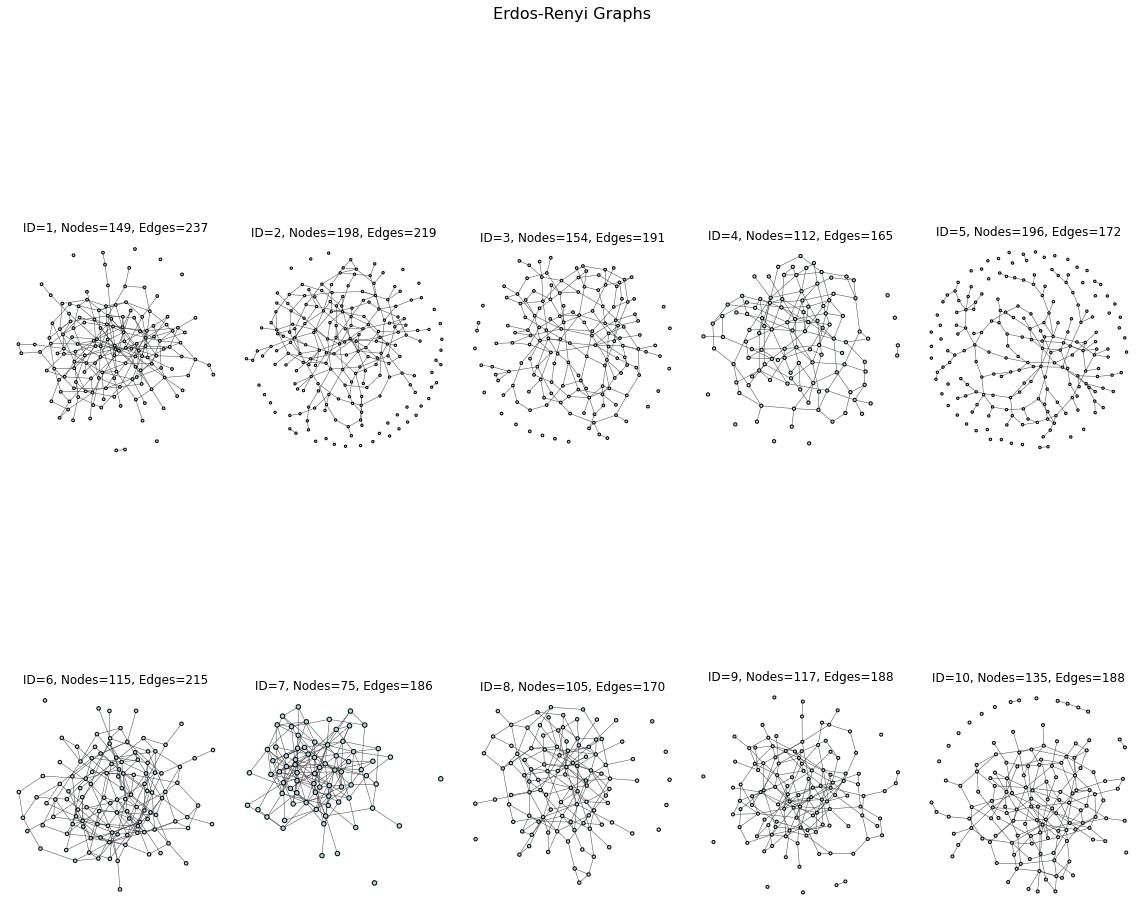

In [40]:
plot_models(erdos_graphs, color="lightblue", vertex_size=0.3, title="Erdos-Renyi Graphs")

In [5]:
watts_graphs = []
n = 10
for i in range(n):
    nodes = np.random.randint(50, 200)
    neighbor = np.random.randint(2, 10)
    wg = ig.Graph.Watts_Strogatz(dim=1, size=nodes, nei=neighbor, p=0.5)
    ig.summary(wg)
    watts_graphs.append(wg)

IGRAPH U--- 118 590 -- 
IGRAPH U--- 104 728 -- 
IGRAPH U--- 56 448 -- 
IGRAPH U--- 122 732 -- 
IGRAPH U--- 61 549 -- 
IGRAPH U--- 58 406 -- 
IGRAPH U--- 74 370 -- 
IGRAPH U--- 141 1128 -- 
IGRAPH U--- 133 665 -- 
IGRAPH U--- 79 553 -- 


In [250]:
print("Average path length for watts model")
for i in range(len(watts_graphs)):
    print("ID :", i+1, " ", watts_graphs[i].average_path_length())

Average path length for watts model
ID : 1   2.310589598725192
ID : 2   1.9876773711725169
ID : 3   1.7136363636363636
ID : 4   2.1757214469584065
ID : 5   1.701639344262295
ID : 6   1.779794313369631
ID : 7   2.082932247315809
ID : 8   2.029888551165147
ID : 9   2.365800865800866
ID : 10   1.8922427783187277


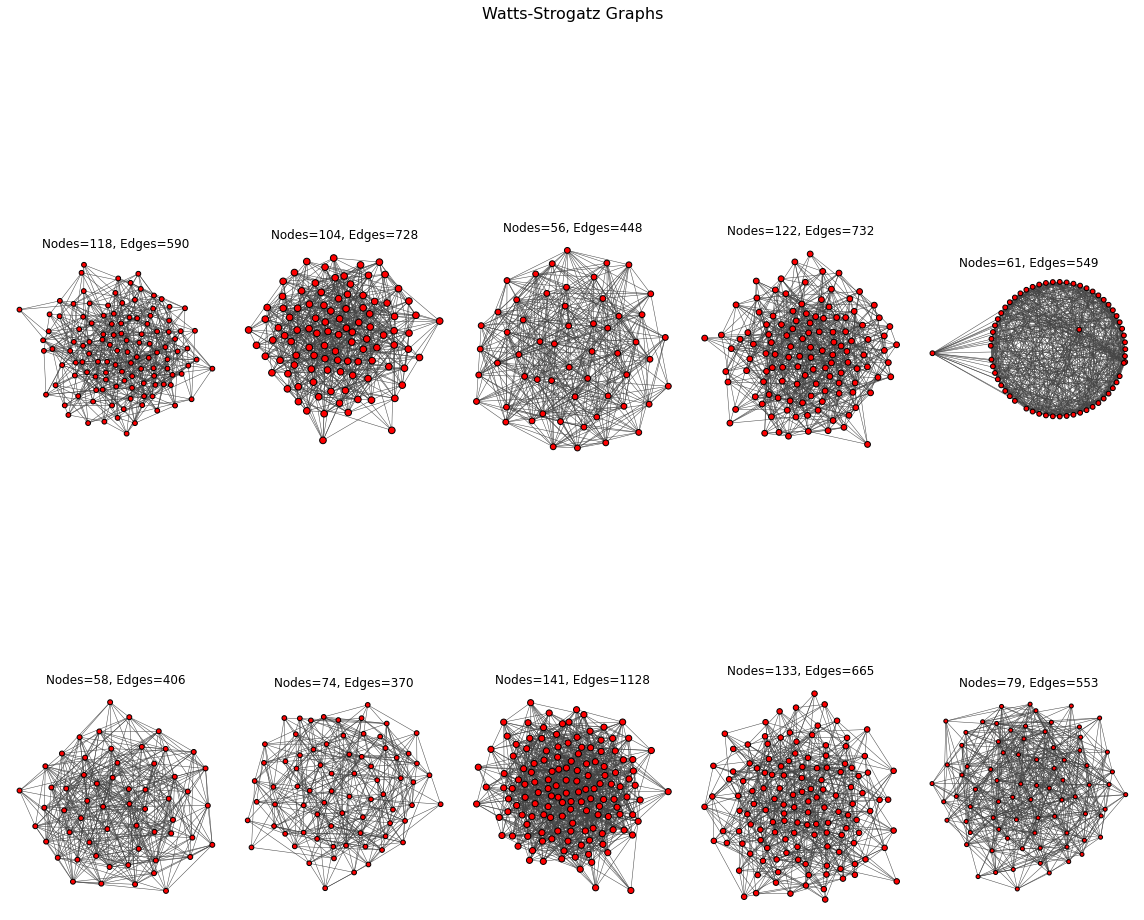

In [13]:
plot_models(watts_graphs, color="red", figsize=(16, 16), title="Watts-Strogatz Graphs")

In [7]:
barabasi_graphs = []
n = 10
for i in range(n):
    nodes = np.random.randint(50, 100)
    edges = np.random.randint(5, 15)
    bg = ig.Graph.Barabasi(n=nodes, m=edges)
    ig.summary(bg)
    barabasi_graphs.append(bg)

IGRAPH U--- 78 375 -- 
IGRAPH U--- 67 780 -- 
IGRAPH U--- 60 689 -- 
IGRAPH U--- 70 399 -- 
IGRAPH U--- 81 962 -- 
IGRAPH U--- 60 495 -- 
IGRAPH U--- 53 475 -- 
IGRAPH U--- 53 250 -- 
IGRAPH U--- 96 732 -- 
IGRAPH U--- 79 870 -- 


In [251]:
print("Average path length for barabasi model")
for i in range(len(barabasi_graphs)):
    print("ID :", i+1, " ", barabasi_graphs[i].average_path_length())

Average path length for barabasi model
ID : 1   2.0935730935730934
ID : 2   1.6472184531886025
ID : 3   1.612994350282486
ID : 4   1.9532091097308488
ID : 5   1.7055555555555555
ID : 6   1.731638418079096
ID : 7   1.6611030478955007
ID : 8   1.9550072568940493
ID : 9   1.9348684210526317
ID : 10   1.7215189873417722


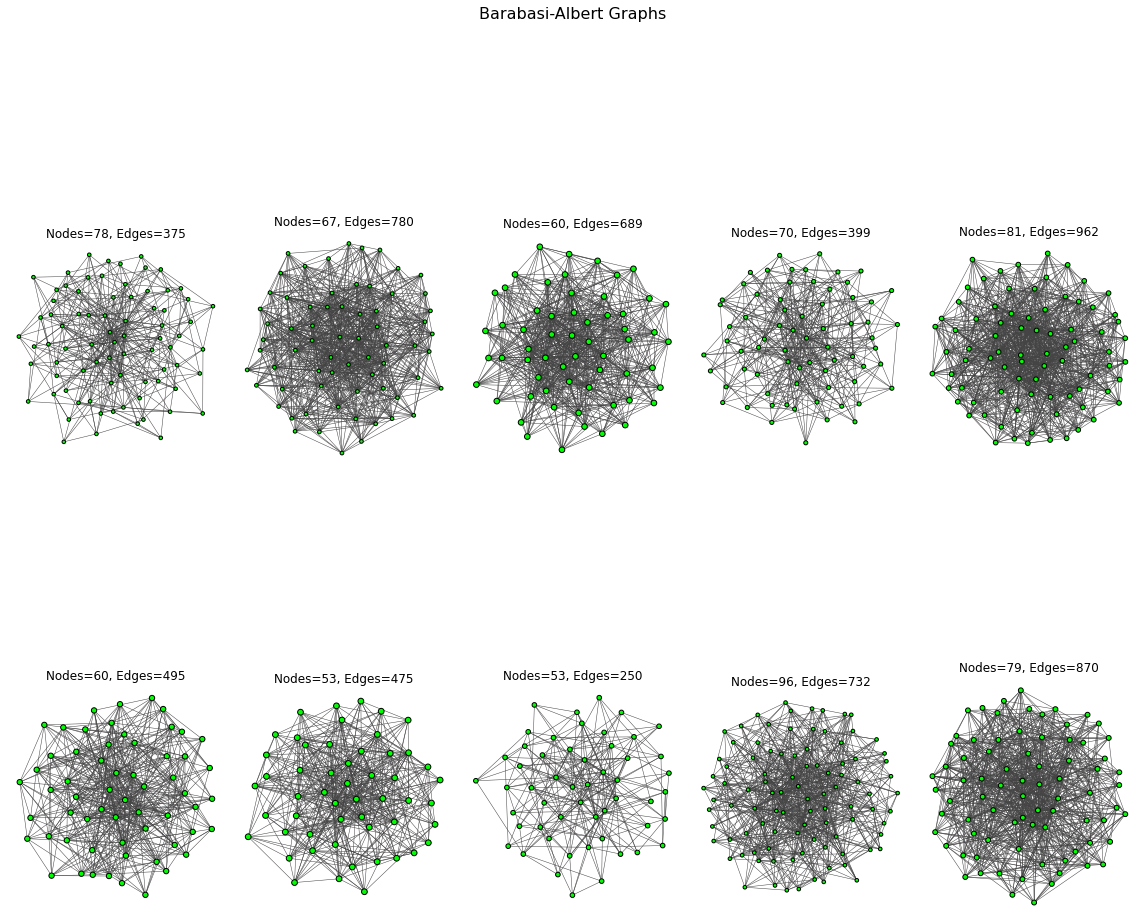

In [14]:
plot_models(barabasi_graphs, "green", title="Barabasi-Albert Graphs")

In [15]:
exp_graphs = []
n = 10
for i in range(n):
    nodes = np.random.randint(50, 100)
    g = ig.Graph.GRG(n=nodes, radius=0.5)
    ig.summary(g)
    exp_graphs.append(g)

IGRAPH U--- 96 2389 -- 
+ attr: x (v), y (v)
IGRAPH U--- 95 2106 -- 
+ attr: x (v), y (v)
IGRAPH U--- 98 2365 -- 
+ attr: x (v), y (v)
IGRAPH U--- 79 1386 -- 
+ attr: x (v), y (v)
IGRAPH U--- 69 1309 -- 
+ attr: x (v), y (v)
IGRAPH U--- 65 999 -- 
+ attr: x (v), y (v)
IGRAPH U--- 50 576 -- 
+ attr: x (v), y (v)
IGRAPH U--- 99 2470 -- 
+ attr: x (v), y (v)
IGRAPH U--- 83 1614 -- 
+ attr: x (v), y (v)
IGRAPH U--- 80 1582 -- 
+ attr: x (v), y (v)


In [253]:
print("Average path length for exponential model")
for i in range(len(exp_graphs)):
    print("ID :", i+1, " ", exp_graphs[i].average_path_length())

Average path length for exponential model
ID : 1   1.5118421052631579
ID : 2   1.5782754759238522
ID : 3   1.544708605091521
ID : 4   1.6244725738396624
ID : 5   1.485933503836317
ID : 6   1.585576923076923
ID : 7   1.5714285714285714
ID : 8   1.5289631003916717
ID : 9   1.5700852189244785
ID : 10   1.5278481012658227


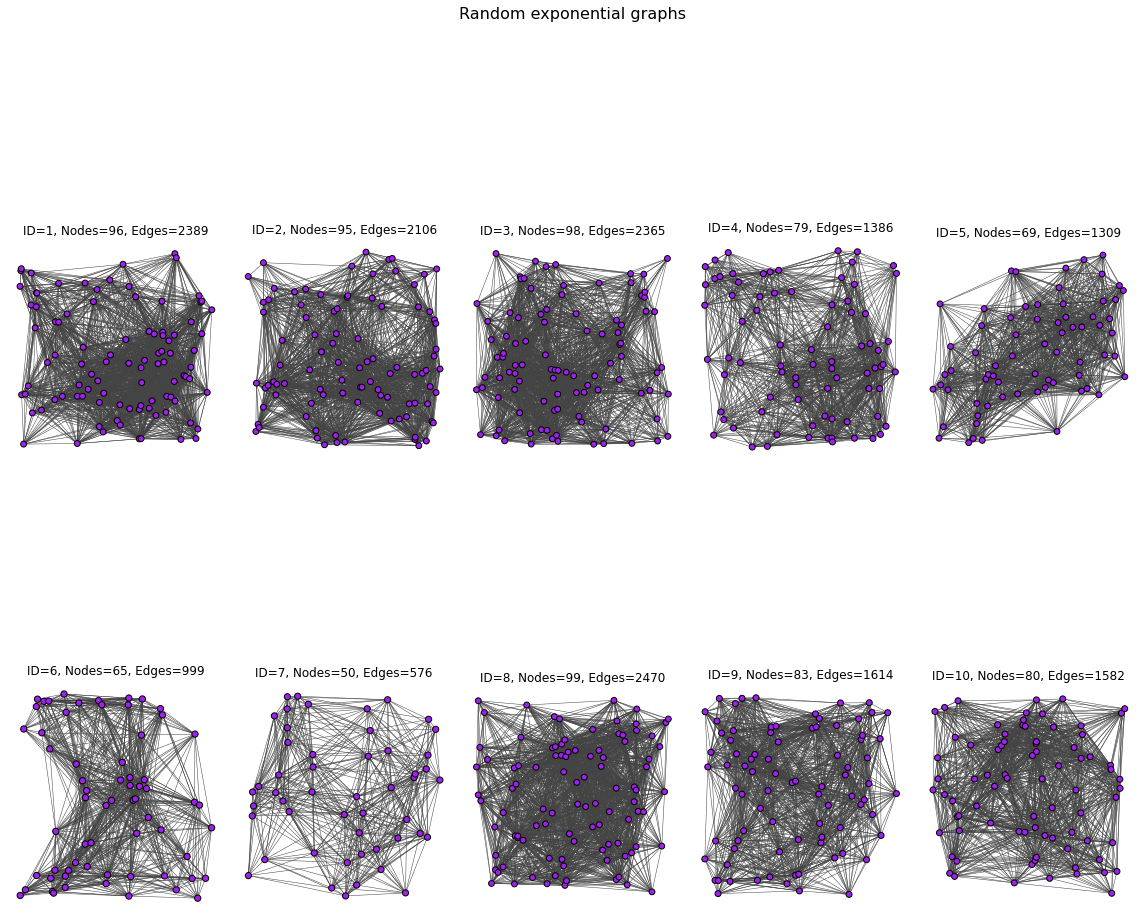

In [106]:
plot_models(exp_graphs, "purple", vertex_size=0.03, title="Random exponential graphs")

In [97]:
def plot_measure(values_dict, bar_color="blue"):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

    ax1.bar(range(1, 11), values_dict["gco"], color=bar_color)
    ax1.set_xticks(range(1, 11))
    ax1.set_xlabel("Graph ID")
    ax1.set_ylabel("GCO")
    ax1.set_title("Global clustering coefficient")

    ax2.bar(range(1, 11), values_dict["sg"], color=bar_color)
    ax2.set_xticks(range(1, 11))
    ax2.set_xlabel("Graph ID")
    ax2.set_ylabel("SG")
    ax2.set_title("Spectral gap")

    ax3.bar(range(1, 11), values_dict["ac"], color=bar_color)
    ax3.set_xticks(range(1, 11))
    ax3.set_xlabel("Graph ID")
    ax3.set_ylabel("AC")
    ax3.set_title("Algebraic connectivity")
    plt.show()

In [98]:
erdos_measures = {"gco":[], "sg":[], "ac":[]}

for i in range(n):
    graph_ = erdos_graphs[i]
    erdos_measures["gco"].append(global_clustering_coefficient(graph_))
    erdos_measures["sg"].append(spectral_gap(graph_))
    erdos_measures["ac"].append(algebraic_connectivity(graph_))

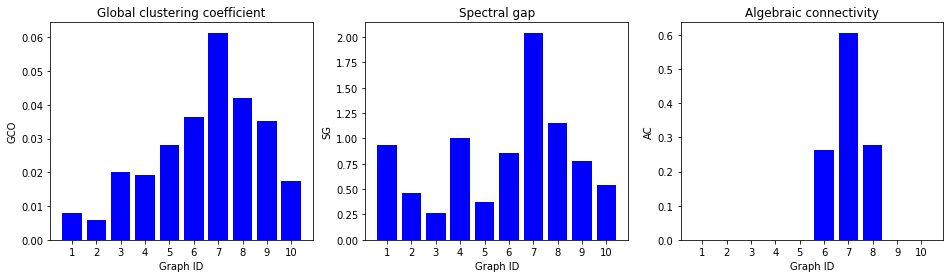

In [158]:
plot_measure(erdos_measures, bar_color="blue")

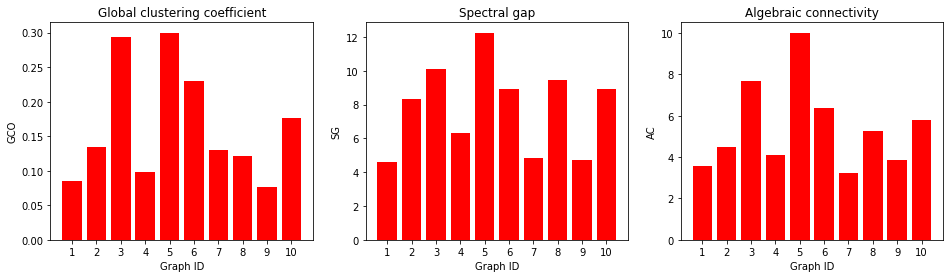

In [103]:
watts_measures = {"gco":[], "sg":[], "ac":[]}

for i in range(n):
    graph_ = watts_graphs[i]
    watts_measures["gco"].append(global_clustering_coefficient(graph_))
    watts_measures["sg"].append(spectral_gap(graph_))
    watts_measures["ac"].append(algebraic_connectivity(graph_))

plot_measure(watts_measures, bar_color="red")

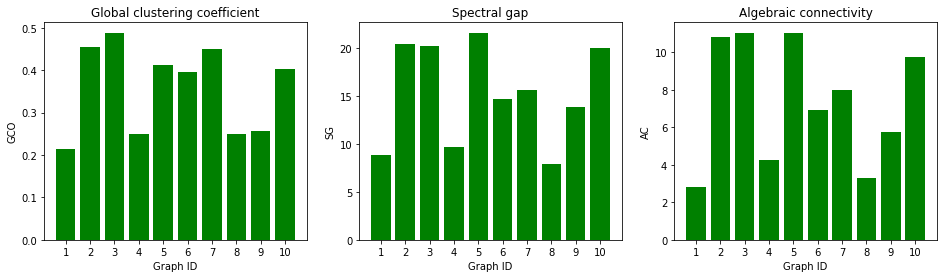

In [104]:
barabasi_measures = {"gco":[], "sg":[], "ac":[]}

for i in range(n):
    graph_ = barabasi_graphs[i]
    barabasi_measures["gco"].append(global_clustering_coefficient(graph_))
    barabasi_measures["sg"].append(spectral_gap(graph_))
    barabasi_measures["ac"].append(algebraic_connectivity(graph_))

plot_measure(barabasi_measures, bar_color="green")

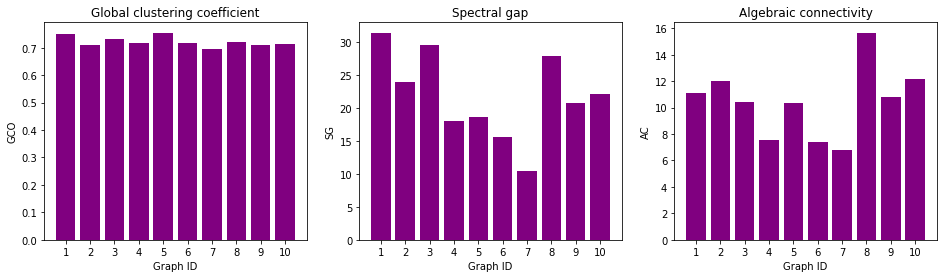

In [107]:
exp_measures = {"gco":[], "sg":[], "ac":[]}

for i in range(n):
    graph_ = exp_graphs[i]
    exp_measures["gco"].append(global_clustering_coefficient(graph_))
    exp_measures["sg"].append(spectral_gap(graph_))
    exp_measures["ac"].append(algebraic_connectivity(graph_))

plot_measure(exp_measures, bar_color="purple")

In [109]:
with open("email-Eu-core.txt", "r") as file:
    # Read edges from file
    edges = file.readlines()

    # Remove the "\n" from each line
    edges = [edge.strip("\n") for edge in edges]

    # Split each line into two nodes
    edges = [edge.split(" ") for edge in edges]

    # Convert the nodes to integers
    edges = [(int(edge[0]), int(edge[1])) for edge in edges]

    # Create the graph
    email_graph = ig.Graph(edges=edges, directed=False)

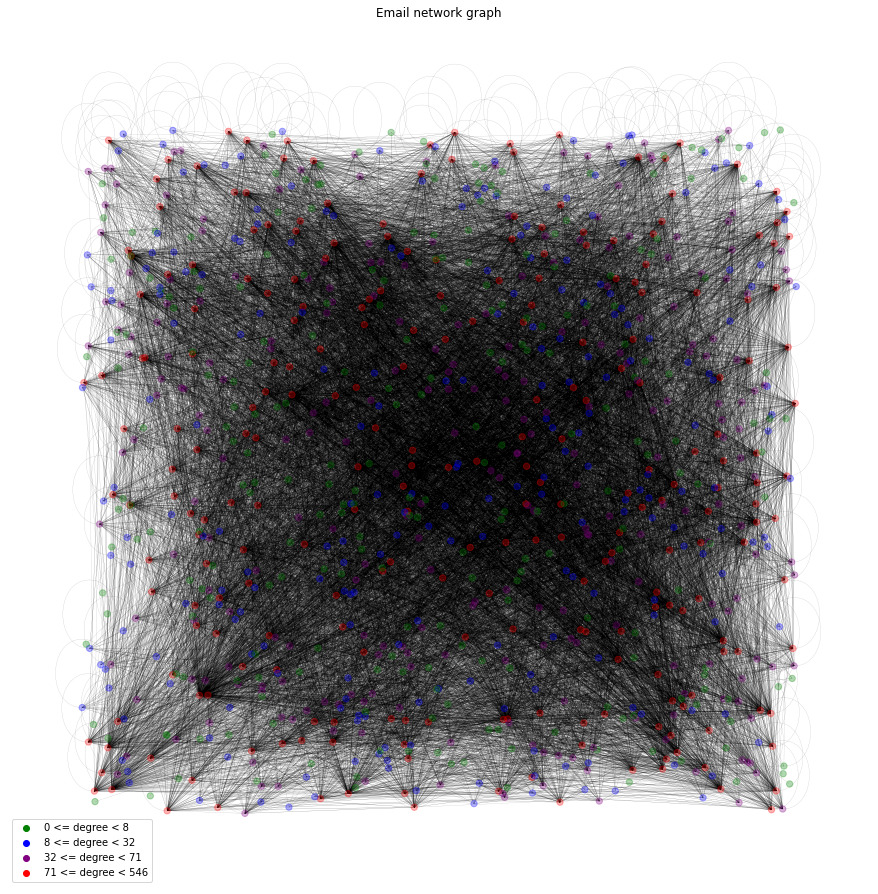

In [119]:
nx_email_graph = email_graph.to_networkx()

degree_dict = dict(nx_email_graph.degree)

degrees = np.array(sorted(degree_dict.values()))
sections = [degrees[len(degrees)//4], degrees[len(degrees)//2], degrees[len(degrees)//4*3]]
color_map = []

for d in degree_dict.values():
    if d < sections[0]:
        color_map.append("green")
    elif sections[0] <= d < sections[1]:
        color_map.append("blue")
    elif sections[1] <= d < sections[2]:
        color_map.append("purple")
    else:
        color_map.append("red")


plt.figure(figsize=(12, 12))
nx.draw(nx_email_graph, node_size=40, node_color=color_map, alpha=0.3, width=0.2, pos=nx.random_layout(nx_email_graph))

sections = [0] + sections + [degrees[-1]]
colors = ["green", "blue", "purple", "red"]

for v in range(len(colors)):
    plt.scatter([],[], c=colors[v], label=f'{sections[v]} <= degree < {sections[v+1]}')

plt.title("Email network graph")
plt.legend()
plt.savefig("email-network.png")
plt.show()

In [182]:
gco_email = global_clustering_coefficient(email_graph)
sg_email = spectral_gap(email_graph)
ac_email = algebraic_connectivity(email_graph)

print("SNAP Email network graph")
print("Global clustering coefficient :", gco_email)
print("Spectral gap :", sg_email)
print("Algebraic connectivity :", ac_email)

SNAP Email network graph
Global clustering coefficient : 0.26739242877040204
Spectral gap : 62.02552757374946
Algebraic connectivity : 0.6313733566198104


In [120]:
with open("facebook_combined.txt", "r") as file:
    # Read edges from file
    edges = file.readlines()

    # Remove the "\n" from each line
    edges = [edge.strip("\n") for edge in edges]

    # Split each line into two nodes
    edges = [edge.split(" ") for edge in edges]

    # Convert the nodes to integers
    edges = [(int(edge[0]), int(edge[1])) for edge in edges]

    # Create the graph
    facebook_graph = ig.Graph(edges=edges, directed=False)

    nx_facebook_graph = facebook_graph.to_networkx()

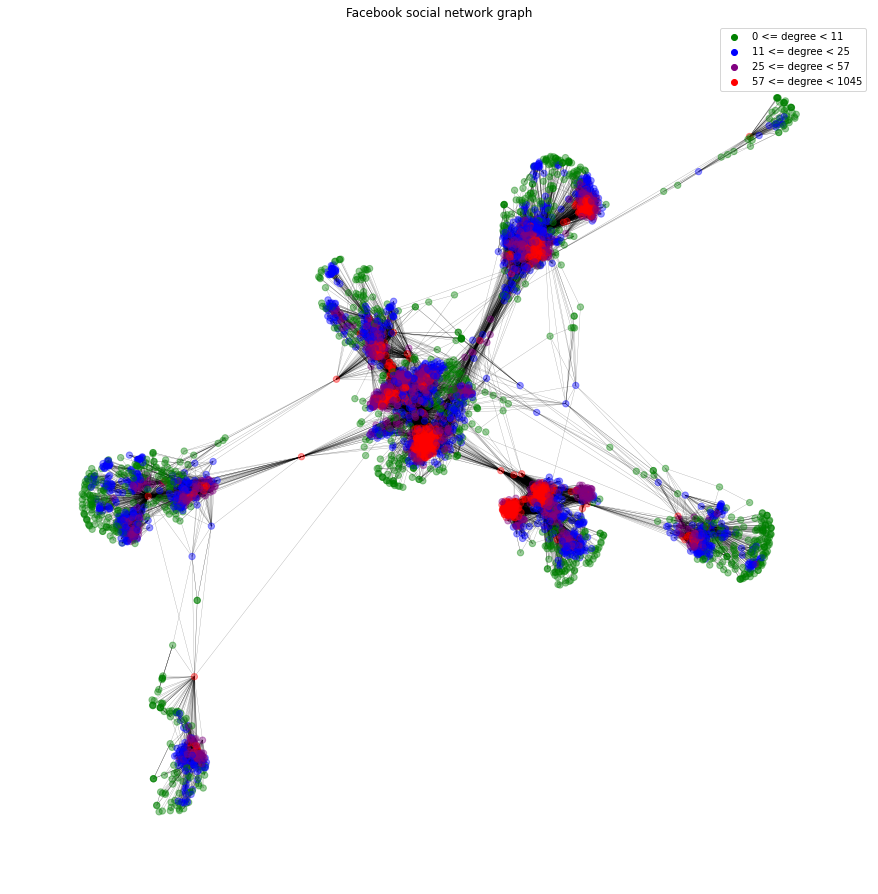

In [122]:
degree_dict = dict(nx_facebook_graph.degree)

degrees = np.array(sorted(degree_dict.values()))
sections = [degrees[len(degrees)//4], degrees[len(degrees)//2], degrees[len(degrees)//4*3]]
color_map = []

for d in degree_dict.values():
    if d < sections[0]:
        color_map.append("green")
    elif sections[0] <= d < sections[1]:
        color_map.append("blue")
    elif sections[1] <= d < sections[2]:
        color_map.append("purple")
    else:
        color_map.append("red")


plt.figure(figsize=(12, 12))
nx.draw(nx_facebook_graph, node_size=40, node_color=color_map, alpha=0.4, width=0.3)

sections = [0] + sections + [degrees[-1]]
colors = ["green", "blue", "purple", "red"]

for v in range(len(colors)):
    plt.scatter([],[], c=colors[v], label=f'{sections[v]} <= degree < {sections[v+1]}')

plt.title("Facebook social network graph")
plt.legend()
plt.savefig("social-network.png")
plt.show()

In [183]:
gco_facebook = global_clustering_coefficient(facebook_graph)
sg_facebook = spectral_gap(facebook_graph)
ac_facebook = algebraic_connectivity(facebook_graph)

print("SNAP Facebook social network graph")
print("Global clustering coefficient :", gco_facebook)
print("Spectral gap :", sg_facebook)
print("Algebraic connectivity :", ac_facebook)

SNAP Facebook social network graph
Global clustering coefficient : 0.5191742775433075
Spectral gap : 36.8807403746528
Algebraic connectivity : 0.028988033385845668


In [217]:
def random_attack(graph, n):
    g = graph.copy()
    for i in range(n):
        g.delete_vertices(random.choice(g.vs))
    return g

def recalculated_degree_removal_attack(graph, n):
    g = graph.copy()
    for i in range(n):
        g.delete_vertices(g.vs.select(_degree_eq=max(g.degree())))
    return g

def recalculated_betweenness_removal_attack(graph, n):
    g = graph.copy()
    for i in range(n):
        g.delete_vertices(g.vs.select(_betweenness_eq=max(g.betweenness())))
    return g


In [142]:
def plot_attacked_measure(values_normal, values_attacked):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

    x = np.arange(1, 11)
    width = 0.40
    # plot data in grouped manner of bar type
    ax1.bar(x-0.2, values_normal["gco"], width)
    ax1.bar(x+0.2, values_attacked["gco"], width)
    ax1.set_xticks(x)
    ax1.set_xlabel("Graph ID")
    ax1.set_ylabel("GCO")
    ax1.set_title("Global clustering coefficient")
    ax1.legend(["Normal", "Attacked"])

    ax2.bar(x-0.2, values_normal["sg"], width)
    ax2.bar(x+0.2, values_attacked["sg"], width)
    ax2.set_xticks(x)
    ax2.set_xlabel("Graph ID")
    ax2.set_ylabel("SG")
    ax2.set_title("Spectral gap")
    ax2.legend(["Normal", "Attacked"])

    ax3.bar(x-0.2, values_normal["ac"], width)
    ax3.bar(x+0.2, values_attacked["ac"], width)
    ax3.set_xticks(x)
    ax3.set_xlabel("Graph ID")
    ax3.set_ylabel("AC")
    ax3.set_title("Algebraic connectivity")
    ax3.legend(["Normal", "Attacked"])

    plt.show()

# Random attack on Erdos model graphs

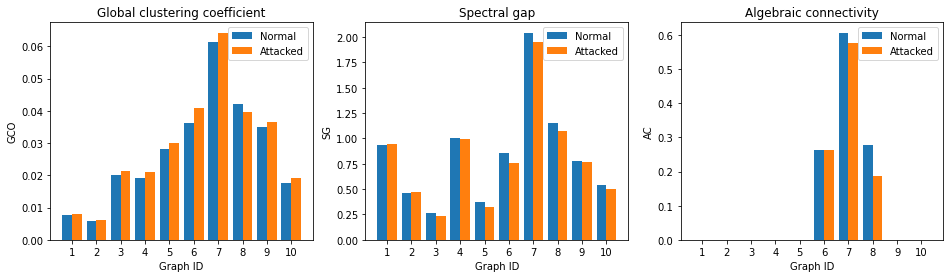

In [233]:
attacked_erdos_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = erdos_graphs[i]
    percent = 3
    nodes_to_attack = int(graph_.vcount()*(percent/100))
    attacked_graph_ = random_attack(graph_, percent)
    attacked_erdos_measures["gco"].append(global_clustering_coefficient(attacked_graph_))
    attacked_erdos_measures["sg"].append(spectral_gap(attacked_graph_))
    attacked_erdos_measures["ac"].append(algebraic_connectivity(attacked_graph_))

plot_attacked_measure(erdos_measures, attacked_erdos_measures)

# Recalculated degree removal attack on Erdos model graphs

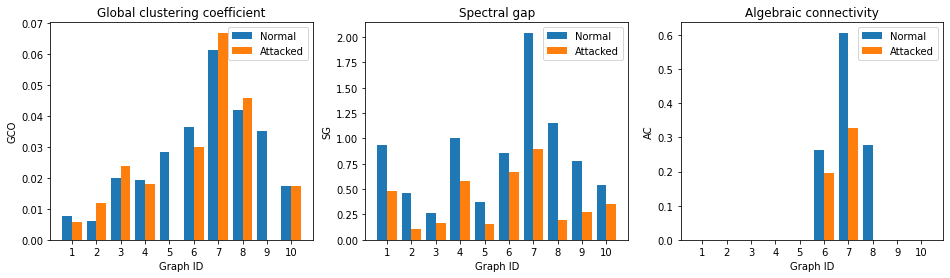

In [159]:
attacked_erdos_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = erdos_graphs[i]
    percent = 3
    nodes_to_attack = int(graph_.vcount()*(percent/100))
    attacked_graph_ = recalculated_degree_removal_attack(graph_, percent)
    attacked_erdos_measures["gco"].append(global_clustering_coefficient(attacked_graph_))
    attacked_erdos_measures["sg"].append(spectral_gap(attacked_graph_))
    attacked_erdos_measures["ac"].append(algebraic_connectivity(attacked_graph_))

plot_attacked_measure(erdos_measures, attacked_erdos_measures)

# Recalculated betweenness removal attack on Erdos model graphs

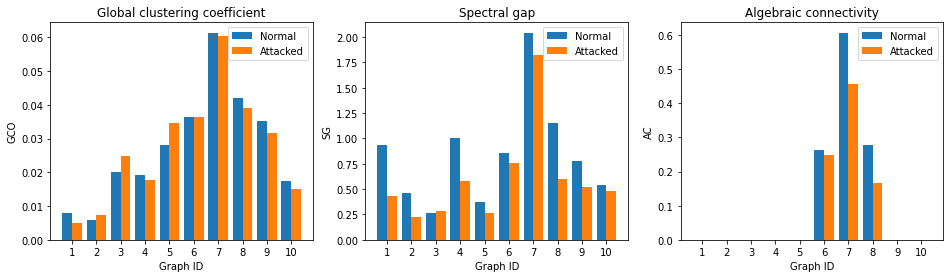

In [234]:
attacked_erdos_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = erdos_graphs[i]
    percent = 3
    nodes_to_attack = int(graph_.vcount()*(percent/100))
    attacked_graph_ = recalculated_betweenness_removal_attack(graph_, percent)
    attacked_erdos_measures["gco"].append(global_clustering_coefficient(attacked_graph_))
    attacked_erdos_measures["sg"].append(spectral_gap(attacked_graph_))
    attacked_erdos_measures["ac"].append(algebraic_connectivity(attacked_graph_))

plot_attacked_measure(erdos_measures, attacked_erdos_measures)

# Random attack on watts model graphs

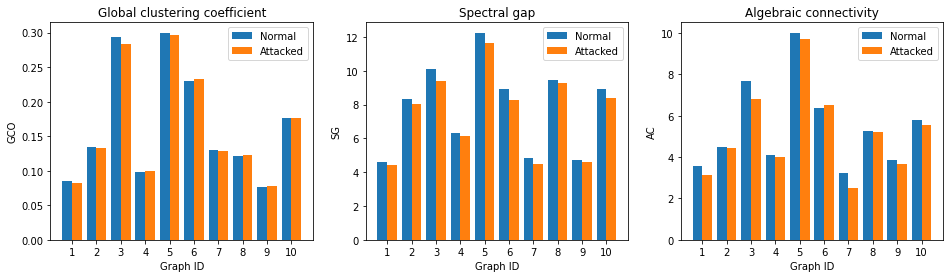

In [235]:
attacked_watts_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = watts_graphs[i]
    percent = 3
    nodes_to_attack = int(graph_.vcount()*(percent/100))
    attacked_graph_ = random_attack(graph_, percent)
    attacked_watts_measures["gco"].append(global_clustering_coefficient(attacked_graph_))
    attacked_watts_measures["sg"].append(spectral_gap(attacked_graph_))
    attacked_watts_measures["ac"].append(algebraic_connectivity(attacked_graph_))

plot_attacked_measure(watts_measures, attacked_watts_measures)

# Recalculated degree removal attack on watts model graphs

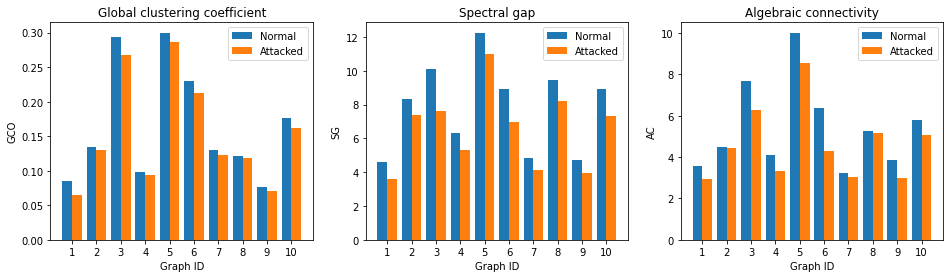

In [156]:
attacked_watts_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = watts_graphs[i]
    percent = 3
    nodes_to_attack = int(graph_.vcount()*(percent/100))
    attacked_graph_ = recalculated_degree_removal_attack(graph_, percent)
    attacked_watts_measures["gco"].append(global_clustering_coefficient(attacked_graph_))
    attacked_watts_measures["sg"].append(spectral_gap(attacked_graph_))
    attacked_watts_measures["ac"].append(algebraic_connectivity(attacked_graph_))

plot_attacked_measure(watts_measures, attacked_watts_measures)

# Recalculated betweenness removal attack on watts model graphs

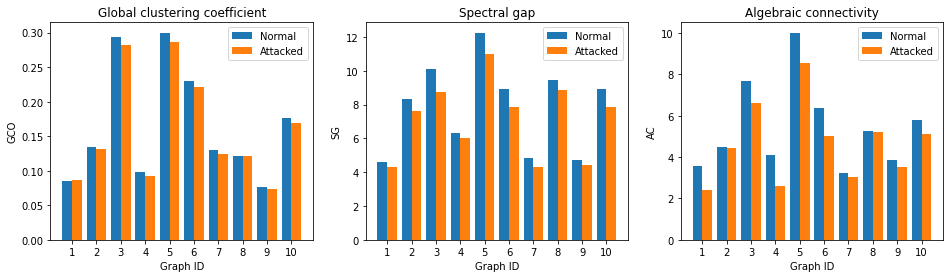

In [236]:
attacked_watts_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = watts_graphs[i]
    percent = 3
    nodes_to_attack = int(graph_.vcount()*(percent/100))
    attacked_graph_ = recalculated_betweenness_removal_attack(graph_, percent)
    attacked_watts_measures["gco"].append(global_clustering_coefficient(attacked_graph_))
    attacked_watts_measures["sg"].append(spectral_gap(attacked_graph_))
    attacked_watts_measures["ac"].append(algebraic_connectivity(attacked_graph_))

plot_attacked_measure(watts_measures, attacked_watts_measures)

# Random attack on Barabasi model graphs

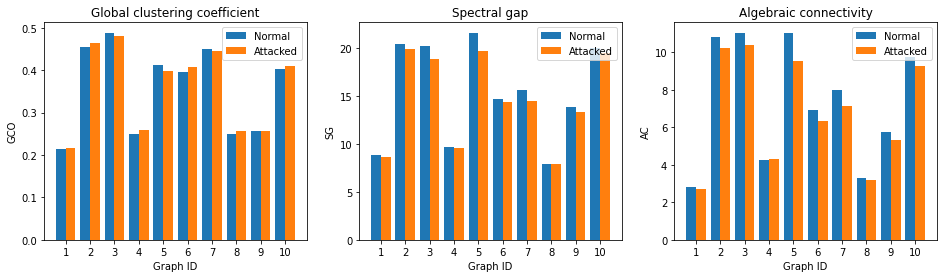

In [237]:
attacked_barabasi_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = barabasi_graphs[i]
    percent = 3
    nodes_to_attack = int(graph_.vcount()*(percent/100))
    attacked_graph_ = random_attack(graph_, percent)
    attacked_barabasi_measures["gco"].append(global_clustering_coefficient(attacked_graph_))
    attacked_barabasi_measures["sg"].append(spectral_gap(attacked_graph_))
    attacked_barabasi_measures["ac"].append(algebraic_connectivity(attacked_graph_))

plot_attacked_measure(barabasi_measures, attacked_barabasi_measures)

# Recalculated degree removal attack on Barabasi model graphs

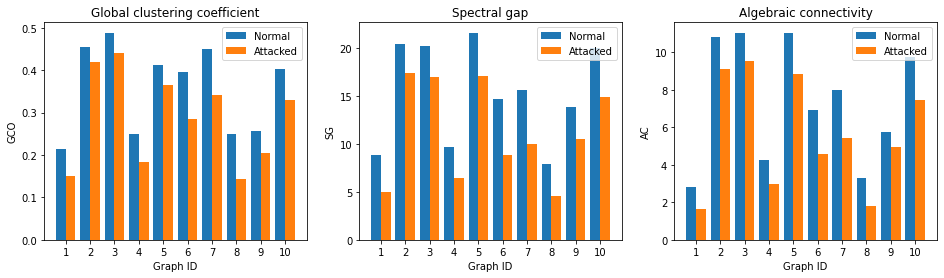

In [151]:
attacked_barabasi_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = barabasi_graphs[i]
    percent = 3
    nodes_to_attack = int(graph_.vcount()*(percent/100))
    attacked_graph_ = recalculated_degree_removal_attack(graph_, percent)
    attacked_barabasi_measures["gco"].append(global_clustering_coefficient(attacked_graph_))
    attacked_barabasi_measures["sg"].append(spectral_gap(attacked_graph_))
    attacked_barabasi_measures["ac"].append(algebraic_connectivity(attacked_graph_))

plot_attacked_measure(barabasi_measures, attacked_barabasi_measures)

# Recalculated degree removal attack on exponential model graphs

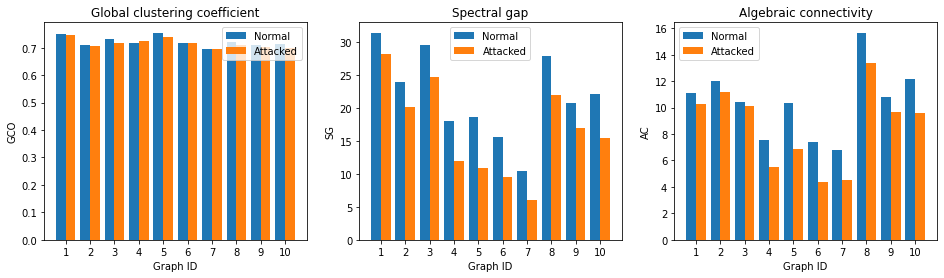

In [153]:
attacked_exponential_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = exp_graphs[i]
    percent = 3
    nodes_to_attack = int(graph_.vcount()*(percent/100))
    attacked_graph_ = recalculated_degree_removal_attack(graph_, percent)
    attacked_exponential_measures["gco"].append(global_clustering_coefficient(attacked_graph_))
    attacked_exponential_measures["sg"].append(spectral_gap(attacked_graph_))
    attacked_exponential_measures["ac"].append(algebraic_connectivity(attacked_graph_))

plot_attacked_measure(exp_measures, attacked_exponential_measures)

# Recalculated betweenness removal attack on exponential model graphs

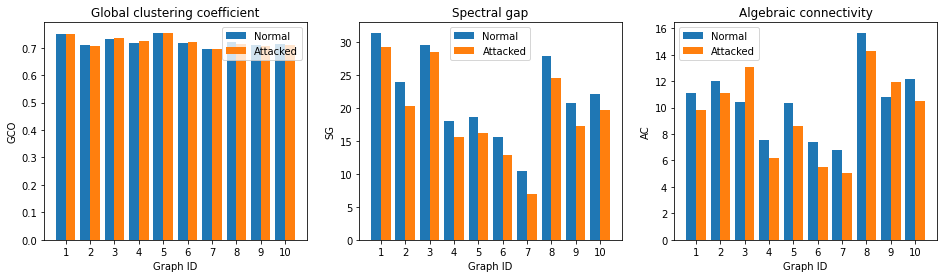

In [154]:
attacked_exponential_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = exp_graphs[i]
    percent = 3
    nodes_to_attack = int(graph_.vcount()*(percent/100))
    attacked_graph_ = recalculated_betweenness_removal_attack(graph_, percent)
    attacked_exponential_measures["gco"].append(global_clustering_coefficient(attacked_graph_))
    attacked_exponential_measures["sg"].append(spectral_gap(attacked_graph_))
    attacked_exponential_measures["ac"].append(algebraic_connectivity(attacked_graph_))

plot_attacked_measure(exp_measures, attacked_exponential_measures)

In [184]:
percent = 5
nodes_to_attack = int(email_graph.vcount()*(percent/100))
attacked_email_graph = recalculated_betweenness_removal_attack(email_graph, nodes_to_attack)

gco_email_attacked = global_clustering_coefficient(attacked_email_graph)
sg_email_attacked = spectral_gap(attacked_email_graph)
ac_email_attacked = algebraic_connectivity(attacked_email_graph)

print("SNAP Email network graph attacked measures")
print("Global clustering coefficient :", gco_email_attacked)
print("Spectral gap :", sg_email_attacked)
print("Algebraic connectivity :", ac_email_attacked)

print("-"*30)

print("SNAP Email network graph normal measures")
print("Global clustering coefficient :", gco_email)
print("Spectral gap :", sg_email)
print("Algebraic connectivity :", ac_email)

SNAP Email network graph attacked measures
Global clustering coefficient : 0.29649143573117465
Spectral gap : 7.681430531491266
Algebraic connectivity : 0.6207994751926129
------------------------------
SNAP Email network graph normal measures
Global clustering coefficient : 0.26739242877040204
Spectral gap : 62.02552757374946
Algebraic connectivity : 0.6313733566198104


In [185]:
percent = 5
nodes_to_attack = int(facebook_graph.vcount()*(percent/100))
attacked_facebook_graph = recalculated_betweenness_removal_attack(facebook_graph, nodes_to_attack)

gco_facebook_attacked = global_clustering_coefficient(attacked_facebook_graph)
sg_facebook_attacked = spectral_gap(attacked_facebook_graph)
ac_facebook_attacked = algebraic_connectivity(attacked_facebook_graph)

print("Facebook network graph attacked measures")
print("Global clustering coefficient :", gco_facebook_attacked)
print("Spectral gap :", sg_facebook_attacked)
print("Algebraic connectivity :", ac_facebook_attacked)

print("-"*30)

print("Facebook network graph normal measures")
print("Global clustering coefficient :", gco_facebook)
print("Spectral gap :", sg_facebook)
print("Algebraic connectivity :", ac_facebook)

Facebook network graph attacked measures
Global clustering coefficient : 0.6108977373560811
Spectral gap : 37.68676938602566
Algebraic connectivity : -9.464761410502781e-14
------------------------------
Facebook network graph normal measures
Global clustering coefficient : 0.5191742775433075
Spectral gap : 36.8807403746528
Algebraic connectivity : 0.028988033385845668


# Defense methods

In [160]:
def isEdgeBetweenClusters(clusters, edge):
    return clusters.membership[edge[0]] != clusters.membership[edge[1]]

def getEdgesBetweenClusters(clusters, graph):
    edges = []
    for edge in graph.get_edgelist():
        if isEdgeBetweenClusters(clusters, edge):
            edges.append(edge)
    return edges

In [226]:
def modified_edge_rewiring(graph, n):
    g = graph.copy()
    for k in range(n):
        clusters = g.community_multilevel()
        if len(clusters) == 1:
            break
        edges = getEdgesBetweenClusters(clusters, g)
        cluster_degrees = [0 for i in range(len(clusters))]
        for e in edges:
            cluster_degrees[clusters.membership[e[0]]] += 1
            cluster_degrees[clusters.membership[e[1]]] += 1
        for i in range(len(clusters)):
            cluster_degrees[i] /= len(clusters[i])

        best_edge_to_remove = edges[0]

        for e in g.get_edgelist():
            if g.degree(e[0]) * g.degree(e[1]) > g.degree(best_edge_to_remove[0]) * g.degree(best_edge_to_remove[1]):
                best_edge_to_remove = e

        g.delete_edges(best_edge_to_remove)

        while len(clusters)>1:
            cluster_to_connect_1 = 0
            cluster_to_connect_2 = 1

            for i in range(len(clusters)):
                for j in range(i+1, len(clusters)):
                    if cluster_degrees[i] * cluster_degrees[j] < cluster_degrees[cluster_to_connect_1] * cluster_degrees[cluster_to_connect_2]:
                        cluster_to_connect_1 = i
                        cluster_to_connect_2 = j

            cluster_1 = list(clusters[cluster_to_connect_1])
            cluster_2 = list(clusters[cluster_to_connect_2])

            while len(cluster_1)>0 and len(cluster_2)>0:
                minimum_degree_node_in_1 = clusters[cluster_to_connect_1][0]

                for node in cluster_1:
                    if g.degree(node) < g.degree(minimum_degree_node_in_1):
                        minimum_degree_node_in_1 = node

                minimum_degree_node_in_2 = clusters[cluster_to_connect_2][0]

                for node in cluster_2:
                    if g.degree(node) < g.degree(minimum_degree_node_in_2):
                        minimum_degree_node_in_2 = node

                if g.are_connected(minimum_degree_node_in_1, minimum_degree_node_in_2):
                    if g.degree(minimum_degree_node_in_1)/len(clusters[clusters.membership[minimum_degree_node_in_1]]) < g.degree(minimum_degree_node_in_2):
                        cluster_2.remove(minimum_degree_node_in_2)
                    else:
                        cluster_1.remove(minimum_degree_node_in_1)
                else:
                    g.add_edge(minimum_degree_node_in_1, minimum_degree_node_in_2)
                    break
            if len(cluster_1) == 0 and len(cluster_2) == 0:
                if cluster_degrees[cluster_to_connect_1] < cluster_degrees[cluster_to_connect_2]:
                    clusters.remove(cluster_to_connect_2)
                    cluster_degrees = cluster_degrees[:cluster_to_connect_2] + cluster_degrees[cluster_to_connect_2+1:]
                else:
                    clusters.remove(cluster_to_connect_1)
                    cluster_degrees = cluster_degrees[:cluster_to_connect_1] + cluster_degrees[cluster_to_connect_1+1:]
            elif len(cluster_1) == 0:
                clusters.remove(cluster_to_connect_1)
                cluster_degrees = cluster_degrees[:cluster_to_connect_1] + cluster_degrees[cluster_to_connect_1+1:]
            elif len(cluster_2) == 0:
                clusters.remove(cluster_to_connect_2)
                cluster_degrees = cluster_degrees[:cluster_to_connect_2] + cluster_degrees[cluster_to_connect_2+1:]
            else:
                break
        if len(clusters) == 1:
            g.add_edge(best_edge_to_remove[0], best_edge_to_remove[1])
            break

    return g

In [192]:
def plot_defense_measure(values_normal, values_defended):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

    x = np.arange(1, 11)
    width = 0.40
    # plot data in grouped manner of bar type
    ax1.bar(x-0.2, values_normal["gco"], width)
    ax1.bar(x+0.2, values_defended["gco"], width)
    ax1.set_xticks(x)
    ax1.set_xlabel("Graph ID")
    ax1.set_ylabel("GCO")
    ax1.set_title("Global clustering coefficient")
    ax1.legend(["Normal", "Defended"])

    ax2.bar(x-0.2, values_normal["sg"], width)
    ax2.bar(x+0.2, values_defended["sg"], width)
    ax2.set_xticks(x)
    ax2.set_xlabel("Graph ID")
    ax2.set_ylabel("SG")
    ax2.set_title("Spectral gap")
    ax2.legend(["Normal", "Defended"])

    ax3.bar(x-0.2, values_normal["ac"], width)
    ax3.bar(x+0.2, values_defended["ac"], width)
    ax3.set_xticks(x)
    ax3.set_xlabel("Graph ID")
    ax3.set_ylabel("AC")
    ax3.set_title("Algebraic connectivity")
    ax3.legend(["Normal", "Defended"])

    plt.show()

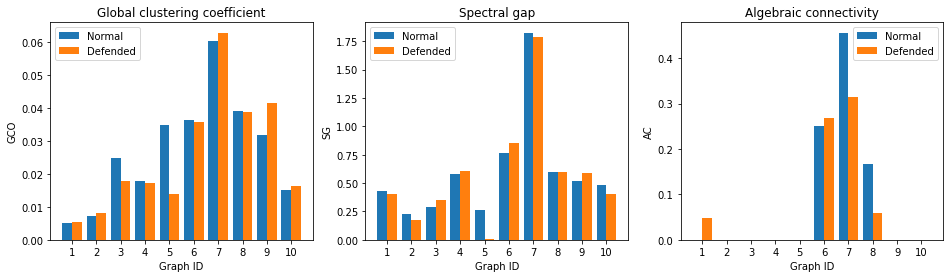

In [227]:
defended_erdos_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = erdos_graphs[i]
    percent = 3
    nodes_to_defense = int(graph_.vcount()*(percent/100))
    defended_graph_ = modified_edge_rewiring(graph_, nodes_to_defense)
    attack_defense_graph_ = recalculated_betweenness_removal_attack(defended_graph_, nodes_to_defense)
    defended_erdos_measures["gco"].append(global_clustering_coefficient(attack_defense_graph_))
    defended_erdos_measures["sg"].append(spectral_gap(attack_defense_graph_))
    defended_erdos_measures["ac"].append(algebraic_connectivity(attack_defense_graph_))

plot_defense_measure(attacked_erdos_measures, defended_erdos_measures)

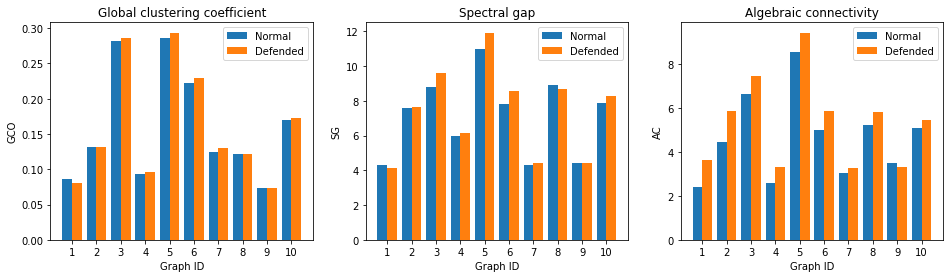

In [228]:
defended_watts_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = watts_graphs[i]
    percent = 3
    nodes_to_defense = int(graph_.vcount()*(percent/100))
    defended_graph_ = modified_edge_rewiring(graph_, nodes_to_defense)
    attack_defense_graph_ = recalculated_betweenness_removal_attack(defended_graph_, nodes_to_defense)
    defended_watts_measures["gco"].append(global_clustering_coefficient(attack_defense_graph_))
    defended_watts_measures["sg"].append(spectral_gap(attack_defense_graph_))
    defended_watts_measures["ac"].append(algebraic_connectivity(attack_defense_graph_))

plot_defense_measure(attacked_watts_measures, defended_watts_measures)

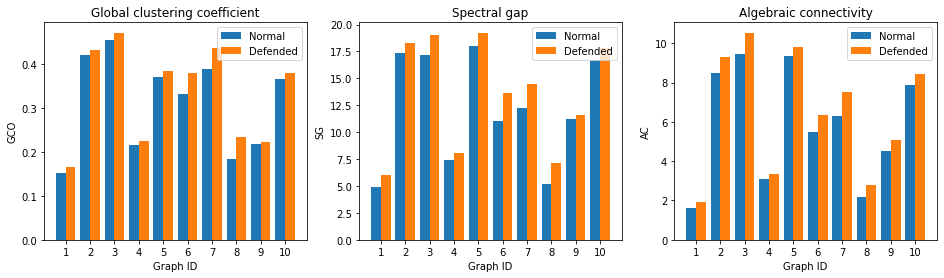

In [229]:
defended_barabasi_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = barabasi_graphs[i]
    percent = 3
    nodes_to_defense = int(graph_.vcount()*(percent/100))
    defended_graph_ = modified_edge_rewiring(graph_, nodes_to_defense)
    attack_defense_graph_ = recalculated_betweenness_removal_attack(defended_graph_, nodes_to_defense)
    defended_barabasi_measures["gco"].append(global_clustering_coefficient(attack_defense_graph_))
    defended_barabasi_measures["sg"].append(spectral_gap(attack_defense_graph_))
    defended_barabasi_measures["ac"].append(algebraic_connectivity(attack_defense_graph_))

plot_defense_measure(attacked_barabasi_measures, defended_barabasi_measures)

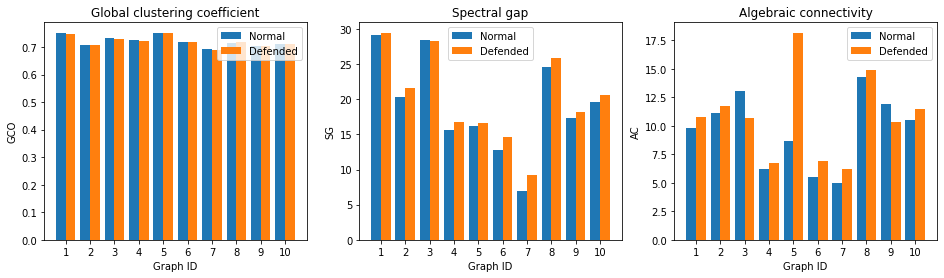

In [230]:
defended_exp_measures = {"gco":[], "sg":[], "ac":[]}
for i in range(n):
    graph_ = exp_graphs[i]
    percent = 3
    nodes_to_defense = int(graph_.vcount()*(percent/100))
    defended_graph_ = modified_edge_rewiring(graph_, nodes_to_defense)
    attack_defense_graph_ = recalculated_betweenness_removal_attack(defended_graph_, nodes_to_defense)
    defended_exp_measures["gco"].append(global_clustering_coefficient(attack_defense_graph_))
    defended_exp_measures["sg"].append(spectral_gap(attack_defense_graph_))
    defended_exp_measures["ac"].append(algebraic_connectivity(attack_defense_graph_))

plot_defense_measure(attacked_exponential_measures, defended_exp_measures)

In [231]:
email_defended = modified_edge_rewiring(email_graph, 10)
email_defend_attack = recalculated_degree_removal_attack(email_defended, 10)

gco_email_defend_attack = global_clustering_coefficient(email_defend_attack)
sg_email_defend_attack = spectral_gap(email_defend_attack)
ac_email_defend_attack = algebraic_connectivity(email_defend_attack)

print("Email network graph attacked measures")
print("Global clustering coefficient :", gco_email_defend_attack)
print("Spectral gap :", sg_email_defend_attack)
print("Algebraic connectivity :", ac_email_defend_attack)

print("-"*30)

print("Email network graph normal measures")
print("Global clustering coefficient :", gco_email_attacked)
print("Spectral gap :", sg_email_attacked)
print("Algebraic connectivity :", ac_email_attacked)

Email network graph attacked measures
Global clustering coefficient : 0.2673505176343738
Spectral gap : 38.72677832282112
Algebraic connectivity : 0.2498652554875013
------------------------------
Email network graph normal measures
Global clustering coefficient : 0.29649143573117465
Spectral gap : 7.681430531491266
Algebraic connectivity : 0.6207994751926129


In [232]:

facebook_defended = modified_edge_rewiring(facebook_graph, 10)
facebook_defend_attack = recalculated_degree_removal_attack(facebook_defended, 10)

gco_facebook_defend_attack = global_clustering_coefficient(facebook_defend_attack)
sg_facebook_defend_attack = spectral_gap(facebook_defend_attack)
ac_facebook_defend_attack = algebraic_connectivity(facebook_defend_attack)

print("Facebook network graph attacked measures")
print("Global clustering coefficient :", gco_facebook_defend_attack)
print("Spectral gap :", sg_facebook_defend_attack)
print("Algebraic connectivity :", ac_facebook_defend_attack)

print("Facebook network graph normal measures")
print("Global clustering coefficient :", gco_facebook_attacked)
print("Spectral gap :", sg_facebook_attacked)
print("Algebraic connectivity :", ac_facebook_attacked)

Facebook network graph attacked measures
Global clustering coefficient : 0.5893721055056294
Spectral gap : 40.680121059053306
Algebraic connectivity : -2.832866114037121e-14
Facebook network graph normal measures
Global clustering coefficient : 0.6108977373560811
Spectral gap : 37.68676938602566
Algebraic connectivity : -9.464761410502781e-14


# Conclusion

## 1. It can be concluded that robustness of graphs can be analyzed by using certain measures.
## 2. Attacks on graphs can impact robustness a lot even if it is performed on small group of vertices which makes it an important research field
## 3. Random graph models can be defended successfully in most cases. But defending real-world graphs is more complex.